TODO : try with more digits
TODO: archi homeo + mask + channels = [8, 16, 16]
TODO: pooling spatial

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/hots/HOTS/HOTS


In [2]:
import os
import pickle
import datetime
from mix_Network import *

dataset = 'nmnist'
records_path = '../Records'
timestr = datetime.datetime.now().date().isoformat()
timestr = '2020-12-21'

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

homeo = True
sigma = None
pooling = False
homeinv = False
jitter = False
tau = 5
nb_train = 500
nb_test = 100
krnlinit = 'first'
nblay = 3
nbclust = 4

In [3]:
def makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test):
    hotshom = network(krnlinit=krnlinit, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learning1by1(dataset=dataset)
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)
    hotshom.plotlayer()  
    if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):       
        trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_train)
        testmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_test)
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
            pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
            trainmaphom, testmaphom = pickle.load(file)
    histoscore(trainmaphom,testmaphom)
    return hotshom, loaderhom, order, trainmaphom, testmaphom

# Hots with homeostasis (best results of nbk NEW HOTS 02)

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_None_False_False


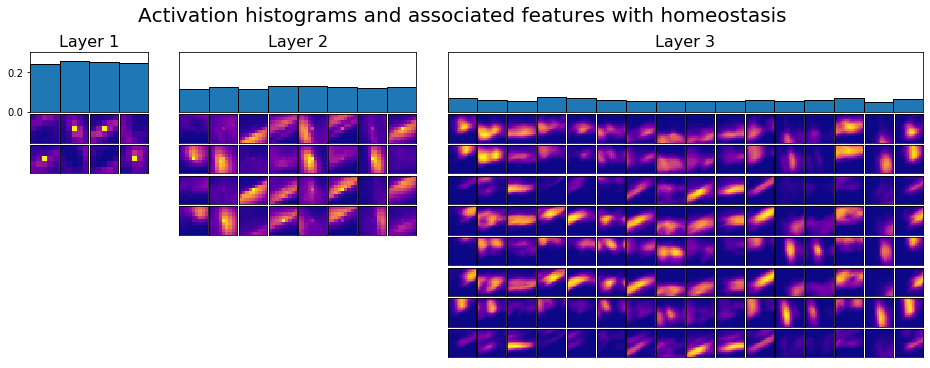

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 87.0% - eucli = 89.0% - norm = 90.0%
Classification scores with kNN: 3-NN = 84.0% - 6-NN = 82.0%
Classification scores with entropy: Kullback-Leibler = 87.0% - Jensen-Shannon = 87.0%
----------------------------------------------------------------------------------------------------


In [4]:
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Testing different tauz

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_0.1_True_None_False_False


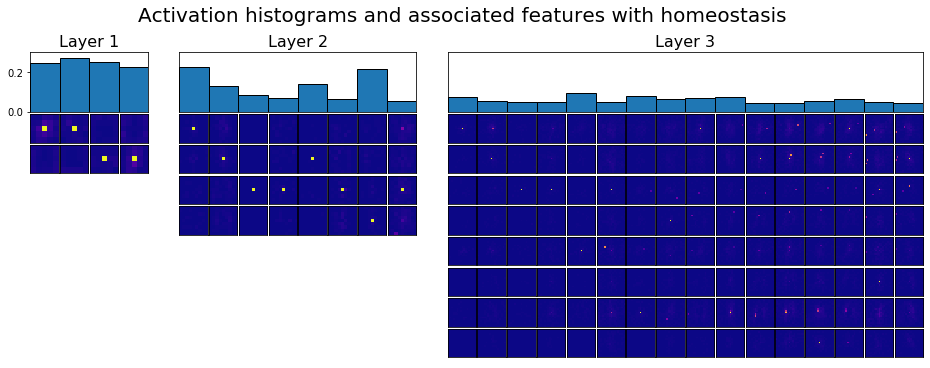

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 13.0% - eucli = 13.0% - norm = 12.0%
Classification scores with kNN: 3-NN = 11.0% - 6-NN = 10.0%
Classification scores with entropy: Kullback-Leibler = 14.000000000000002% - Jensen-Shannon = 13.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_0.5_True_None_False_False


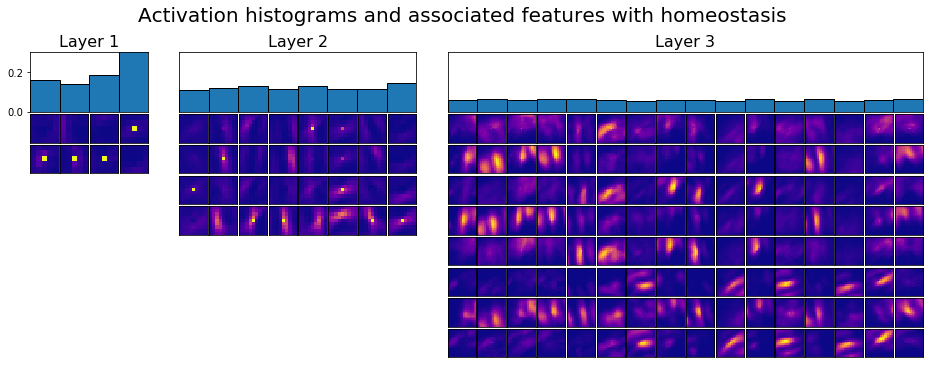

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 61.0% - eucli = 61.0% - norm = 61.0%
Classification scores with kNN: 3-NN = 60.0% - 6-NN = 59.0%
Classification scores with entropy: Kullback-Leibler = 61.0% - Jensen-Shannon = 61.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_1_True_None_False_False


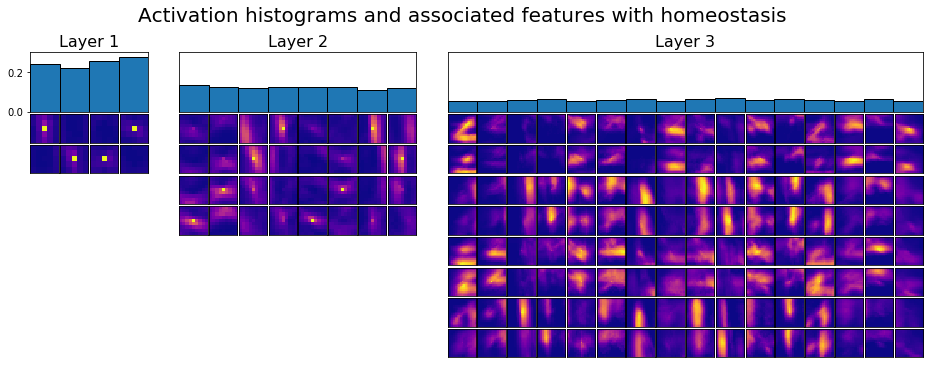

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 78.0% - eucli = 78.0% - norm = 77.0%
Classification scores with kNN: 3-NN = 75.0% - 6-NN = 72.0%
Classification scores with entropy: Kullback-Leibler = 78.0% - Jensen-Shannon = 78.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_2_True_None_False_False


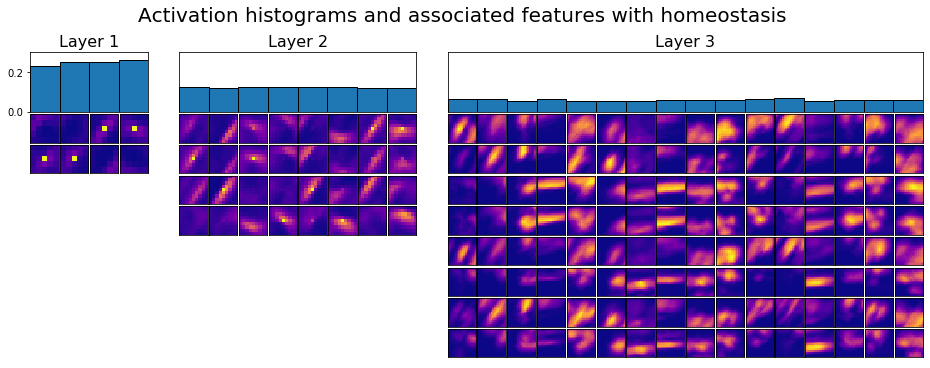

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 67.0% - eucli = 66.0% - norm = 67.0%
Classification scores with kNN: 3-NN = 67.0% - 6-NN = 71.0%
Classification scores with entropy: Kullback-Leibler = 69.0% - Jensen-Shannon = 67.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_None_False_False


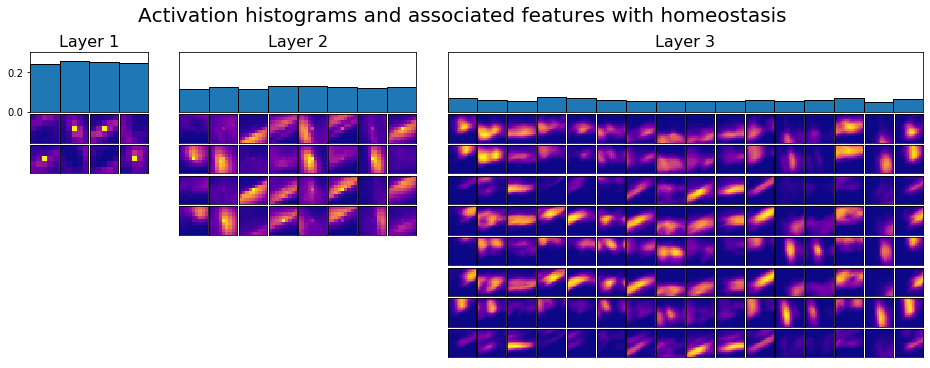

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 87.0% - eucli = 89.0% - norm = 90.0%
Classification scores with kNN: 3-NN = 84.0% - 6-NN = 82.0%
Classification scores with entropy: Kullback-Leibler = 87.0% - Jensen-Shannon = 87.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_10_True_None_False_False


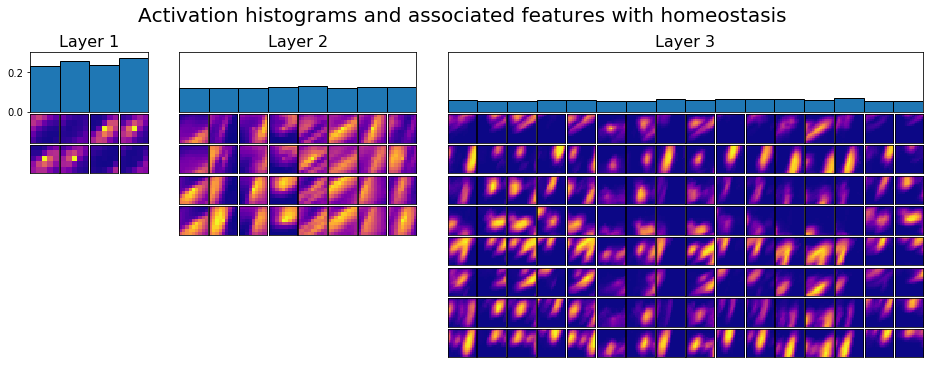

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 78.0% - eucli = 78.0% - norm = 78.0%
Classification scores with kNN: 3-NN = 77.0% - 6-NN = 81.0%
Classification scores with entropy: Kullback-Leibler = 78.0% - Jensen-Shannon = 78.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_20_True_None_False_False


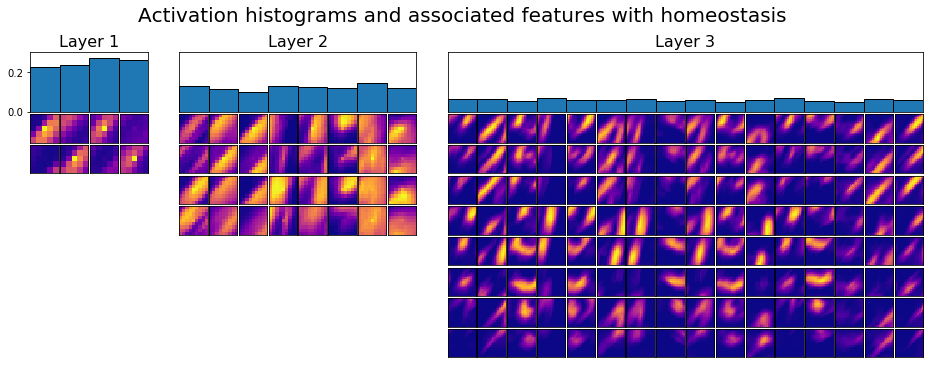

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 78.0% - eucli = 78.0% - norm = 78.0%
Classification scores with kNN: 3-NN = 74.0% - 6-NN = 74.0%
Classification scores with entropy: Kullback-Leibler = 78.0% - Jensen-Shannon = 78.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_50_True_None_False_False


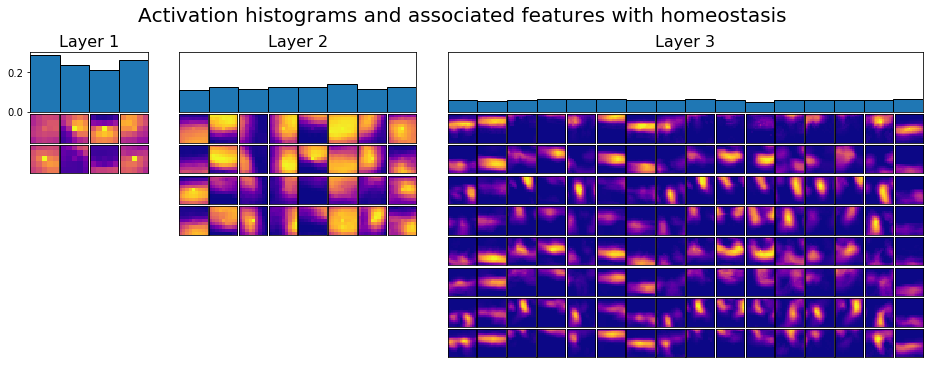

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 76.0% - eucli = 79.0% - norm = 79.0%
Classification scores with kNN: 3-NN = 79.0% - 6-NN = 76.0%
Classification scores with entropy: Kullback-Leibler = 77.0% - Jensen-Shannon = 76.0%
----------------------------------------------------------------------------------------------------


In [5]:
for tau in [0.1, 0.5, 1, 2, 5, 10, 20, 50]:
    makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Testing different architectures

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4]_5_True_None_False_False


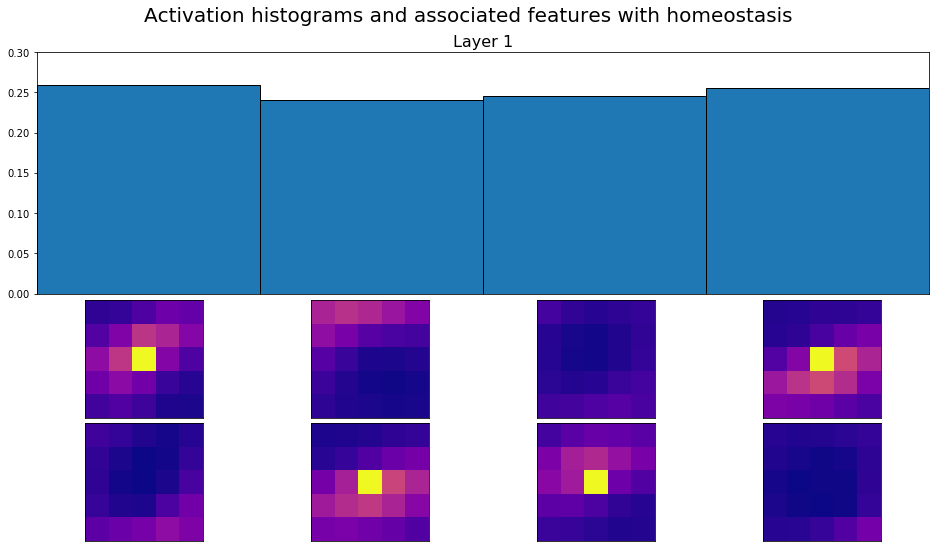


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 23.0% - eucli = 23.0% - norm = 23.0%
Classification scores with kNN: 3-NN = 22.0% - 6-NN = 25.0%
Classification scores with entropy: Kullback-Leibler = 23.0% - Jensen-Shannon = 23.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[8]_5_True_None_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


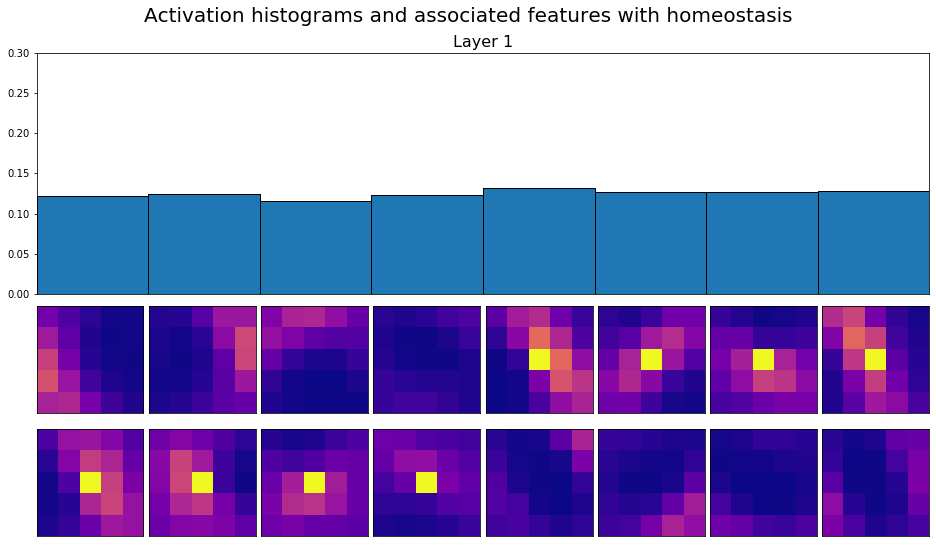


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 42.0% - eucli = 42.0% - norm = 42.0%
Classification scores with kNN: 3-NN = 39.0% - 6-NN = 39.0%
Classification scores with entropy: Kullback-Leibler = 42.0% - Jensen-Shannon = 42.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[16]_5_True_None_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


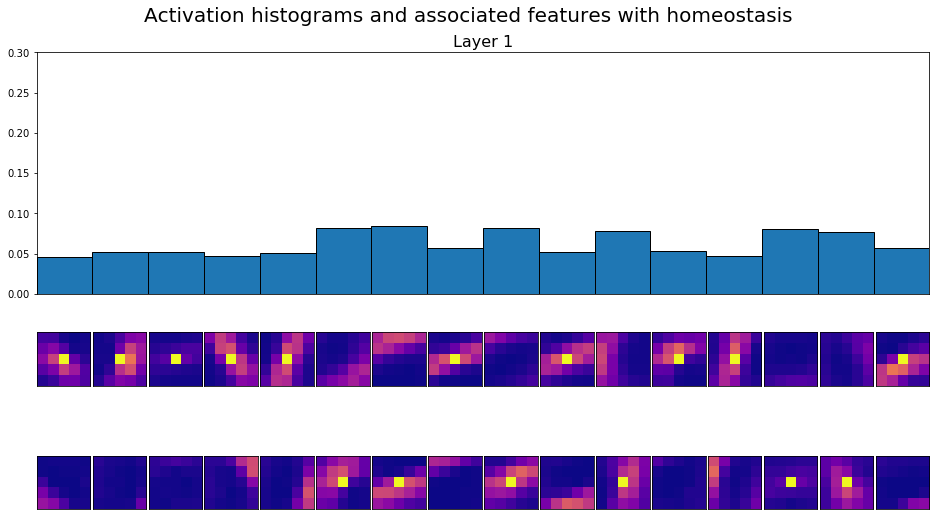


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 52.0% - eucli = 50.0% - norm = 51.0%
Classification scores with kNN: 3-NN = 50.0% - 6-NN = 50.0%
Classification scores with entropy: Kullback-Leibler = 52.0% - Jensen-Shannon = 52.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8]_5_True_None_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


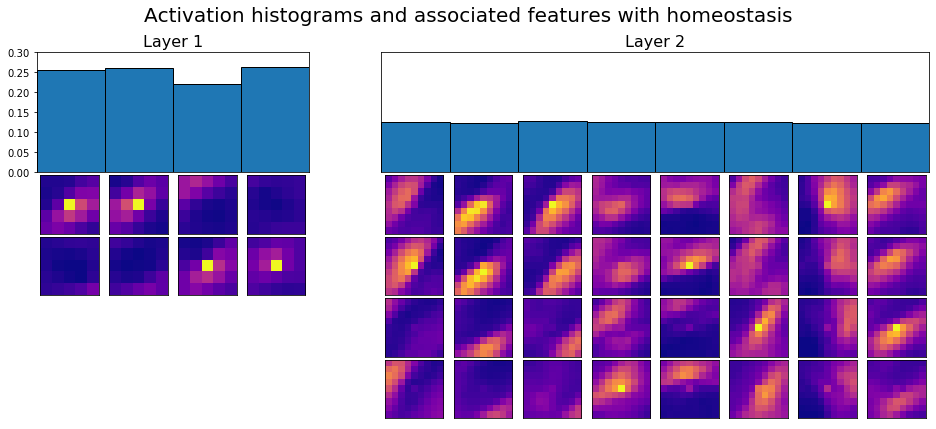


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 60.0% - eucli = 59.0% - norm = 60.0%
Classification scores with kNN: 3-NN = 54.0% - 6-NN = 62.0%
Classification scores with entropy: Kullback-Leibler = 60.0% - Jensen-Shannon = 60.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[8, 16]_5_True_None_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


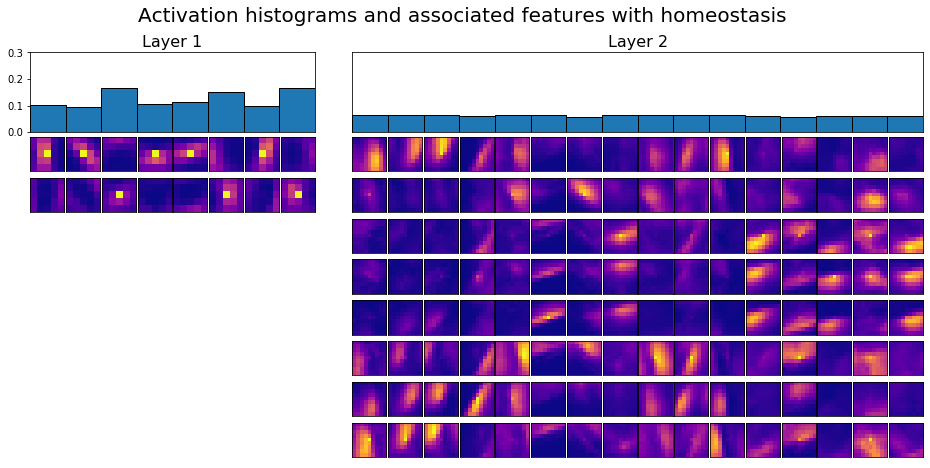


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 60.0% - eucli = 60.0% - norm = 60.0%
Classification scores with kNN: 3-NN = 61.0% - 6-NN = 63.0%
Classification scores with entropy: Kullback-Leibler = 62.0% - Jensen-Shannon = 60.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[16, 32]_5_True_None_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


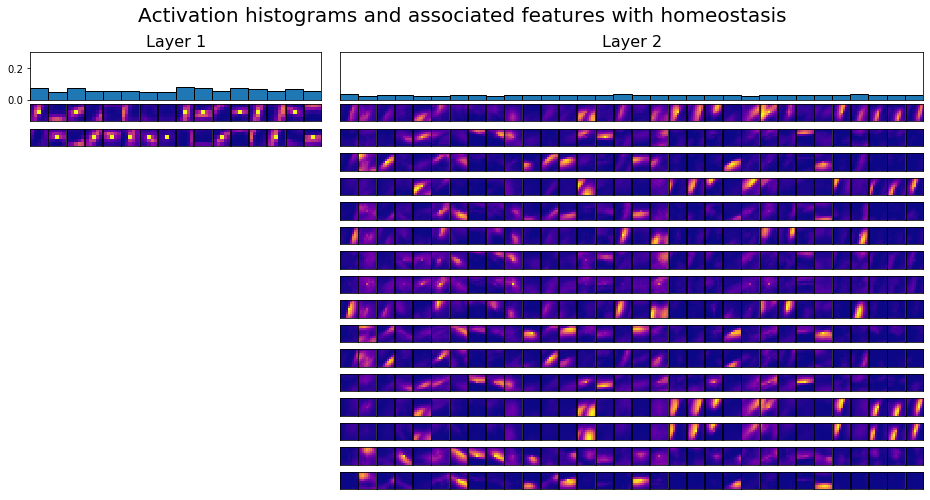


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 72.0% - eucli = 67.0% - norm = 69.0%
Classification scores with kNN: 3-NN = 67.0% - 6-NN = 70.0%
Classification scores with entropy: Kullback-Leibler = 72.0% - Jensen-Shannon = 72.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_None_False_False


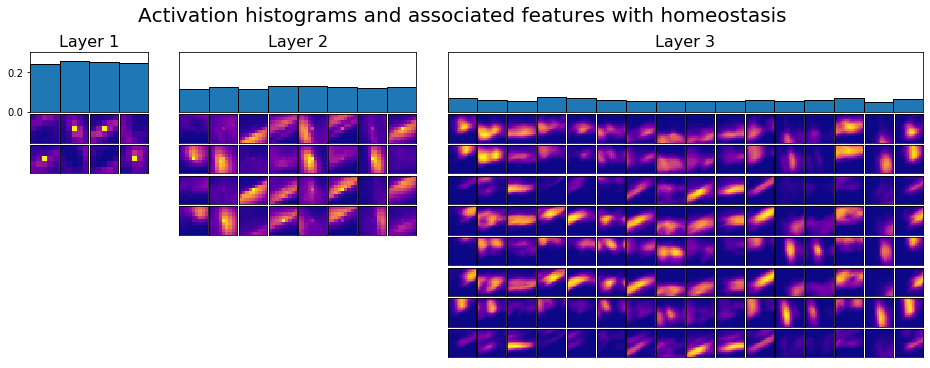

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 87.0% - eucli = 89.0% - norm = 90.0%
Classification scores with kNN: 3-NN = 84.0% - 6-NN = 82.0%
Classification scores with entropy: Kullback-Leibler = 87.0% - Jensen-Shannon = 87.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[8, 16, 32]_5_True_None_False_False


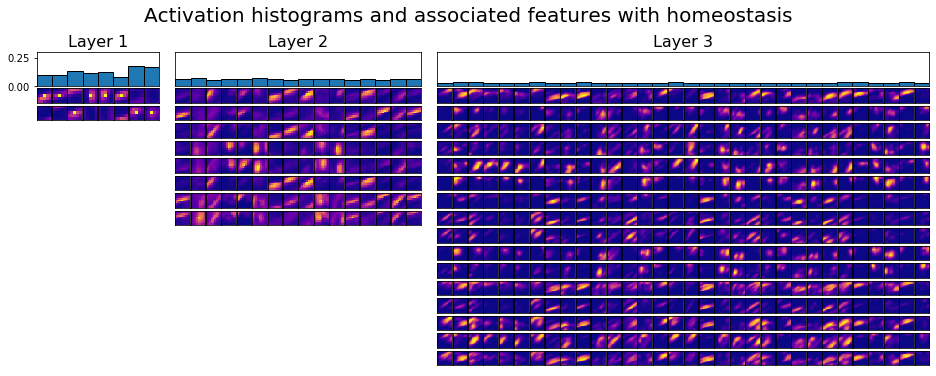

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 81.0% - eucli = 82.0% - norm = 82.0%
Classification scores with kNN: 3-NN = 77.0% - 6-NN = 80.0%
Classification scores with entropy: Kullback-Leibler = 80.0% - Jensen-Shannon = 81.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[16, 32, 64]_5_True_None_False_False


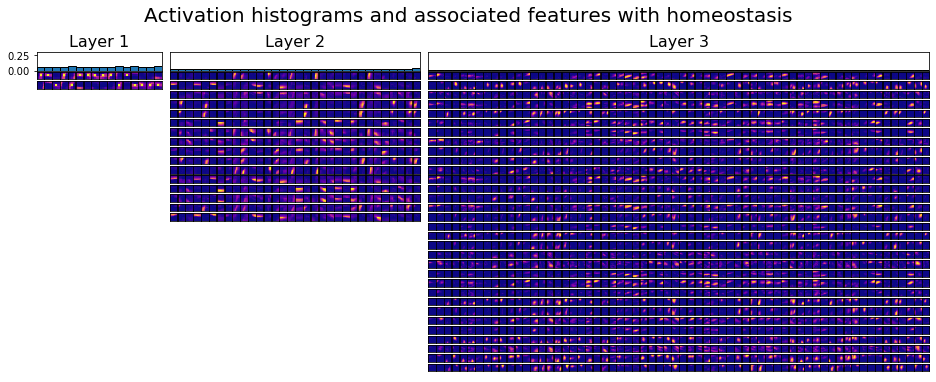

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 91.0% - eucli = 90.0% - norm = 90.0%
Classification scores with kNN: 3-NN = 89.0% - 6-NN = 86.0%
Classification scores with entropy: Kullback-Leibler = 91.0% - Jensen-Shannon = 91.0%
----------------------------------------------------------------------------------------------------


In [6]:
tau = 5
for nblay in [1, 2, 3]:
    for nbclust in [4, 8, 16]:
        makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Filtering all TS on the best results

../Records/EXP_03_NMNIST/2020-12-21_hots_filtall_nmnist_[4, 8, 16]_5_True_None_False_False_False


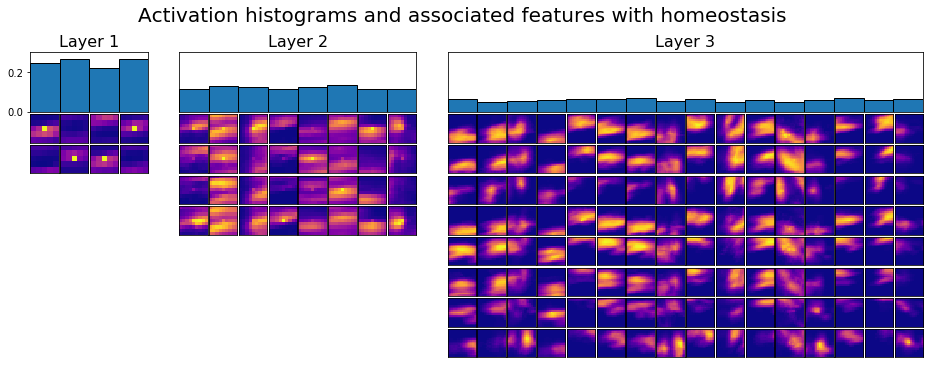

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 79.60000000000001% - eucli = 78.60000000000001% - norm = 78.60000000000001%
Classification scores with kNN: 3-NN = 78.2% - 6-NN = 78.8%
Classification scores with entropy: Kullback-Leibler = 79.4% - Jensen-Shannon = 79.60000000000001%
----------------------------------------------------------------------------------------------------


In [7]:
nblay = 3
nbclust = 4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_filtall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learning1by1(filtering='all')
    with open(fname+'_model.pkl', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model.pkl', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
hotshom.plotlayer()
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
histoscore(trainmaphom,testmaphom)

## Stronger filter on the best results

../Records/EXP_03_NMNIST/2020-12-21_hots_filtall_nmnist_[4, 8, 16]_5_True_None_False_False_False


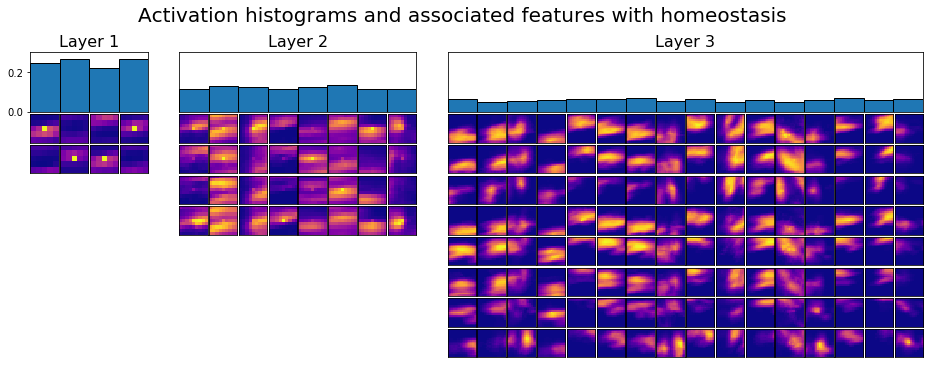

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 79.60000000000001% - eucli = 78.60000000000001% - norm = 78.60000000000001%
Classification scores with kNN: 3-NN = 78.2% - 6-NN = 78.8%
Classification scores with entropy: Kullback-Leibler = 79.4% - Jensen-Shannon = 79.60000000000001%
----------------------------------------------------------------------------------------------------


In [8]:
hotshom = network(krnlinit='first', tau=tau, homeo=homeo, filt=5)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_filtall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learning1by1(filtering='all')
    with open(fname+'_model.pkl', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model.pkl', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
hotshom.plotlayer()
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
histoscore(trainmaphom,testmaphom)

# No homeostasis on the best results

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_False_None_False_False


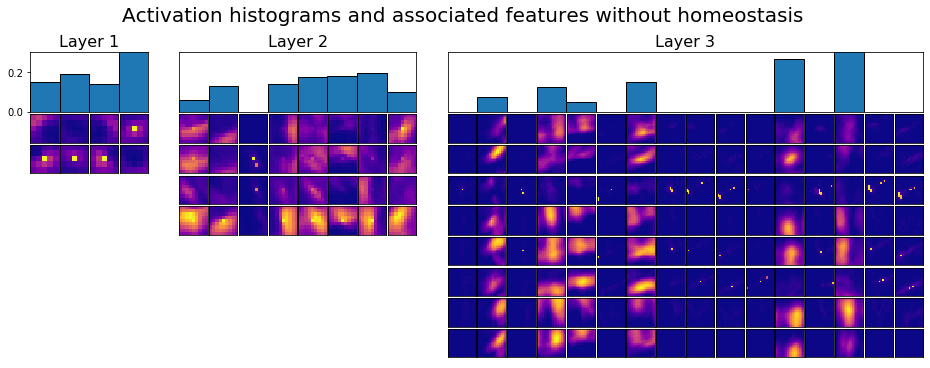

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 51.0% - eucli = 48.0% - norm = 48.0%
Classification scores with kNN: 3-NN = 56.99999999999999% - 6-NN = 56.00000000000001%
Classification scores with entropy: Kullback-Leibler = 50.0% - Jensen-Shannon = 51.0%
----------------------------------------------------------------------------------------------------


In [9]:
homeo = False
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Training all layers at the same time

## With homeostasis

../Records/EXP_03_NMNIST/2020-12-21_hots_learnall_nmnist_[4, 8, 16]_5_True_None_False_False_False


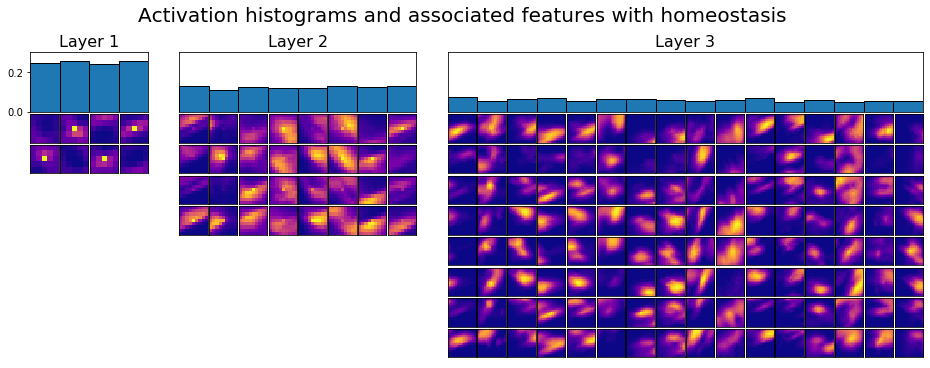

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 82.8% - eucli = 83.8% - norm = 83.8%
Classification scores with kNN: 3-NN = 84.0% - 6-NN = 84.6%
Classification scores with entropy: Kullback-Leibler = 82.8% - Jensen-Shannon = 82.8%
----------------------------------------------------------------------------------------------------


In [10]:
homeo = True

hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_learnall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learningall()
    with open(fname+'_model.pkl', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model.pkl', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
hotshom.plotlayer()
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
histoscore(trainmaphom,testmaphom)

## Without homeostasis

../Records/EXP_03_NMNIST/2020-12-21_hots_learnall_nmnist_[4, 8, 16]_5_False_None_False_False_False


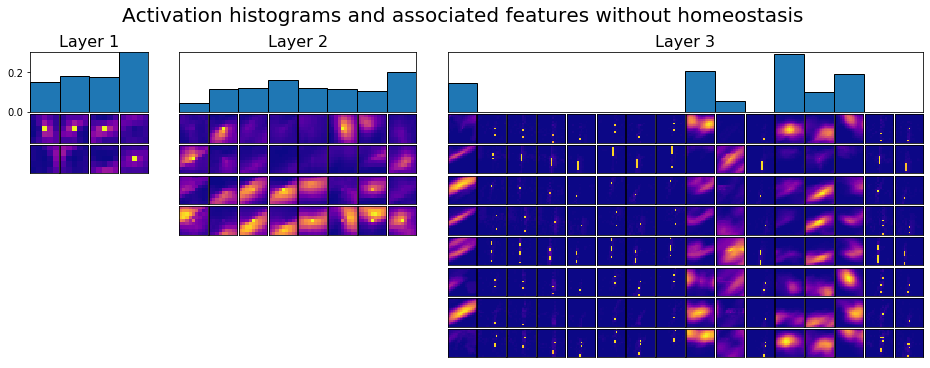

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 45.2% - eucli = 38.0% - norm = 38.2%
Classification scores with kNN: 3-NN = 36.0% - 6-NN = 38.2%
Classification scores with entropy: Kullback-Leibler = 46.2% - Jensen-Shannon = 44.6%
----------------------------------------------------------------------------------------------------


In [11]:
homeo = False

hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_learnall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learningall()
    with open(fname+'_model.pkl', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model.pkl', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
hotshom.plotlayer()
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
histoscore(trainmaphom,testmaphom)

## Varying $\tau$

../Records/EXP_03_NMNIST/2020-12-21_hots_learnall_nmnist_[4, 8, 16]_0.1_True_None_False_False_False


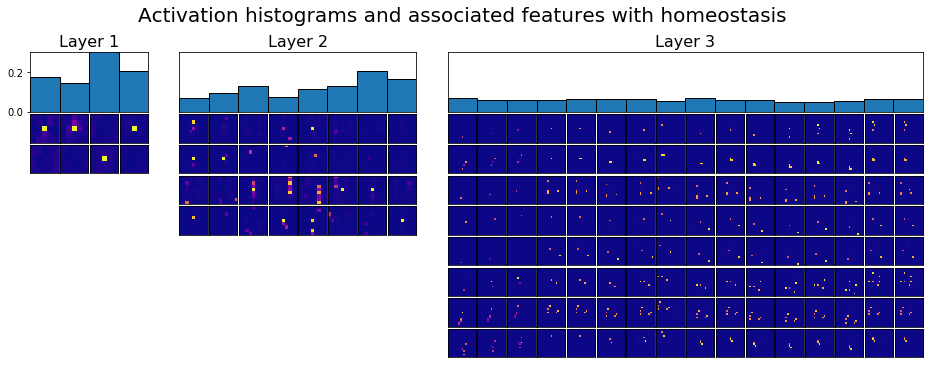

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 11.600000000000001% - eucli = 11.4% - norm = 11.600000000000001%
Classification scores with kNN: 3-NN = 10.6% - 6-NN = 18.6%
Classification scores with entropy: Kullback-Leibler = 11.600000000000001% - Jensen-Shannon = 11.600000000000001%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_learnall_nmnist_[4, 8, 16]_0.5_True_None_False_False_False


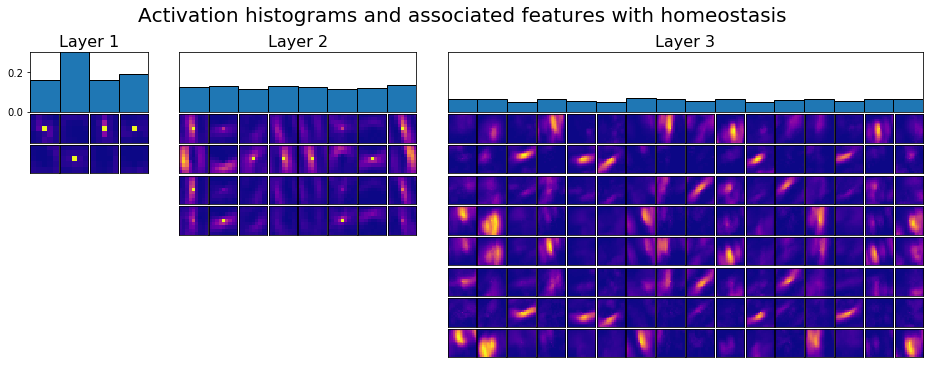

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 61.8% - eucli = 60.8% - norm = 60.4%
Classification scores with kNN: 3-NN = 60.0% - 6-NN = 60.0%
Classification scores with entropy: Kullback-Leibler = 61.8% - Jensen-Shannon = 61.8%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_learnall_nmnist_[4, 8, 16]_1_True_None_False_False_False


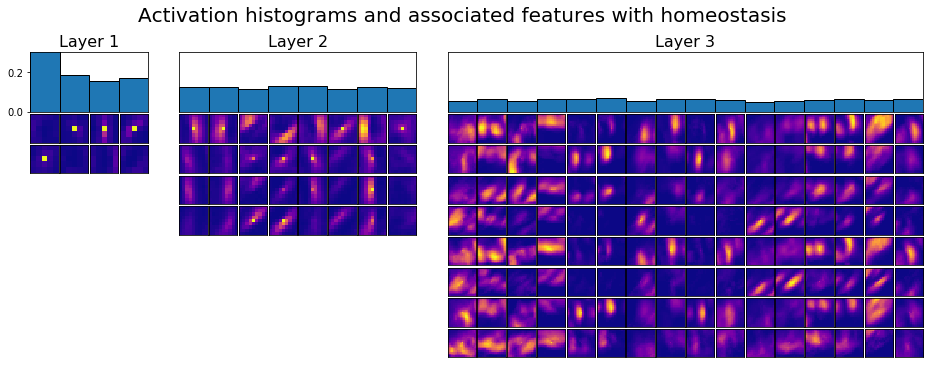

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 73.8% - eucli = 72.2% - norm = 72.39999999999999%
Classification scores with kNN: 3-NN = 74.8% - 6-NN = 75.8%
Classification scores with entropy: Kullback-Leibler = 74.2% - Jensen-Shannon = 73.8%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_learnall_nmnist_[4, 8, 16]_2_True_None_False_False_False


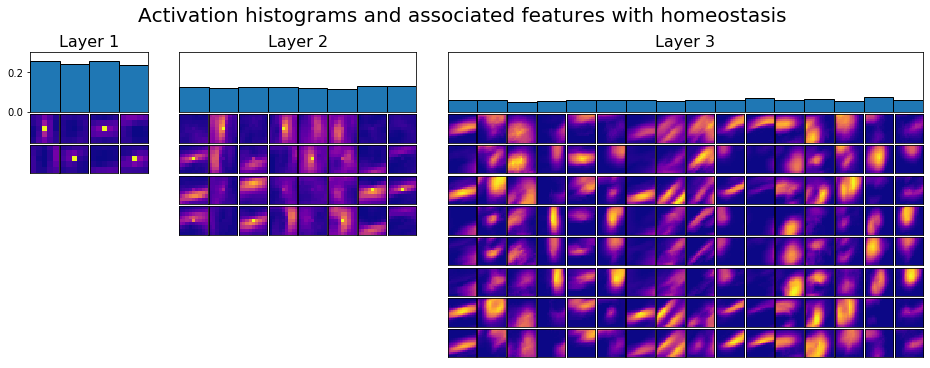

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 78.0% - eucli = 77.60000000000001% - norm = 78.2%
Classification scores with kNN: 3-NN = 76.4% - 6-NN = 75.0%
Classification scores with entropy: Kullback-Leibler = 78.0% - Jensen-Shannon = 78.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_learnall_nmnist_[4, 8, 16]_5_True_None_False_False_False


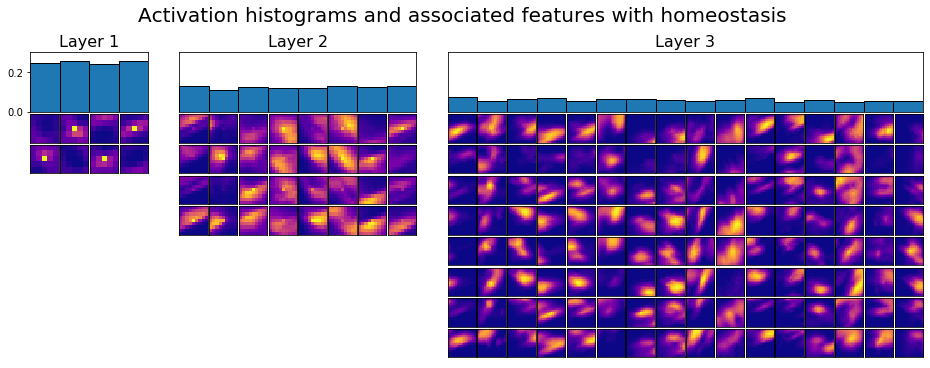

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 82.8% - eucli = 83.8% - norm = 83.8%
Classification scores with kNN: 3-NN = 84.0% - 6-NN = 84.6%
Classification scores with entropy: Kullback-Leibler = 82.8% - Jensen-Shannon = 82.8%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_learnall_nmnist_[4, 8, 16]_10_True_None_False_False_False


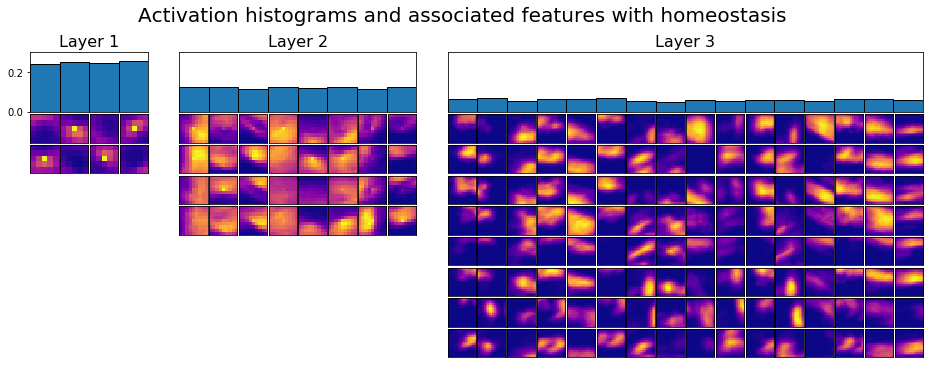

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 81.0% - eucli = 80.60000000000001% - norm = 80.80000000000001%
Classification scores with kNN: 3-NN = 80.60000000000001% - 6-NN = 79.2%
Classification scores with entropy: Kullback-Leibler = 80.4% - Jensen-Shannon = 81.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_learnall_nmnist_[4, 8, 16]_20_True_None_False_False_False


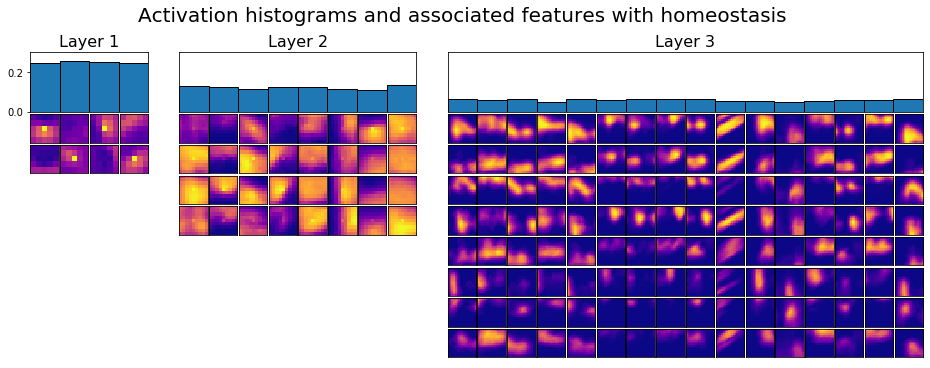

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 78.0% - eucli = 80.0% - norm = 79.80000000000001%
Classification scores with kNN: 3-NN = 77.8% - 6-NN = 79.60000000000001%
Classification scores with entropy: Kullback-Leibler = 77.4% - Jensen-Shannon = 78.0%
----------------------------------------------------------------------------------------------------


In [12]:
homeo = True
for tau in [0.1, 0.5, 1, 2, 5, 10, 20]:
    hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_learnall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learningall()
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)
    hotshom.plotlayer()

    if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
        trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
        testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
            pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
            trainmaphom, testmaphom = pickle.load(file)
    histoscore(trainmaphom,testmaphom)

# Training on more videos

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_None_False_False


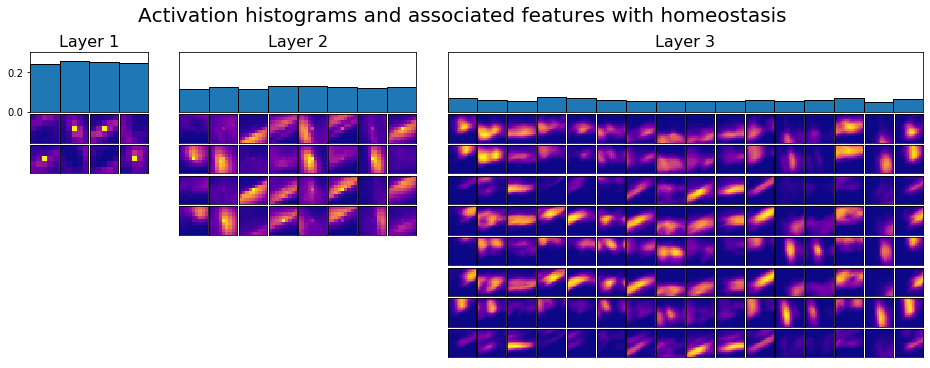


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 87.0% - eucli = 86.0% - norm = 86.0%
Classification scores with kNN: 3-NN = 83.0% - 6-NN = 83.0%
Classification scores with entropy: Kullback-Leibler = 87.0% - Jensen-Shannon = 87.0%
----------------------------------------------------------------------------------------------------


In [13]:
tau = 5
nb_train = 2000
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Activation maps

In [14]:
    hotshom = network(krnlinit=krnlinit, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learning1by1(dataset=dataset)
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_None_False_False


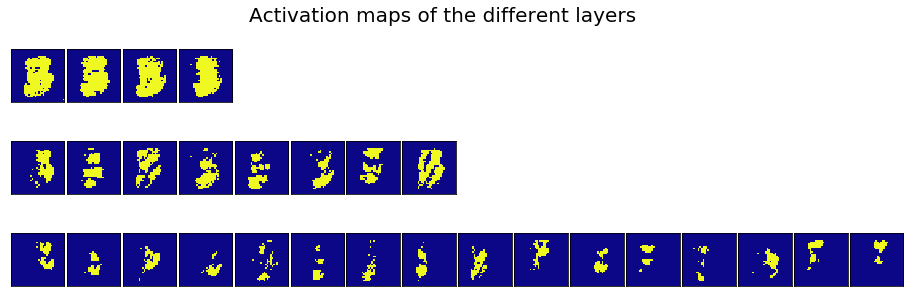

In [15]:
trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = 1, to_record=True)
hotshom.plotactiv()

In [16]:
    hotshom = network(krnlinit=krnlinit, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_learnall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learningall(dataset=dataset)
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)

../Records/EXP_03_NMNIST/2020-12-21_hots_learnall_nmnist_[4, 8, 16]_5_True_None_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


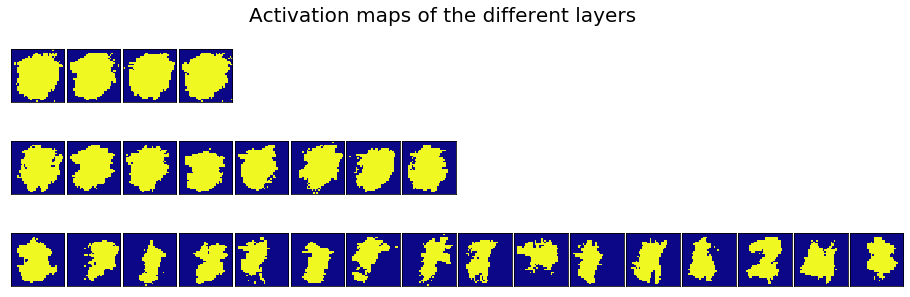

In [17]:
trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = 1, to_record=True)
hotshom.plotactiv()

# Apply gaussian masking to the kernels

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_0.5_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


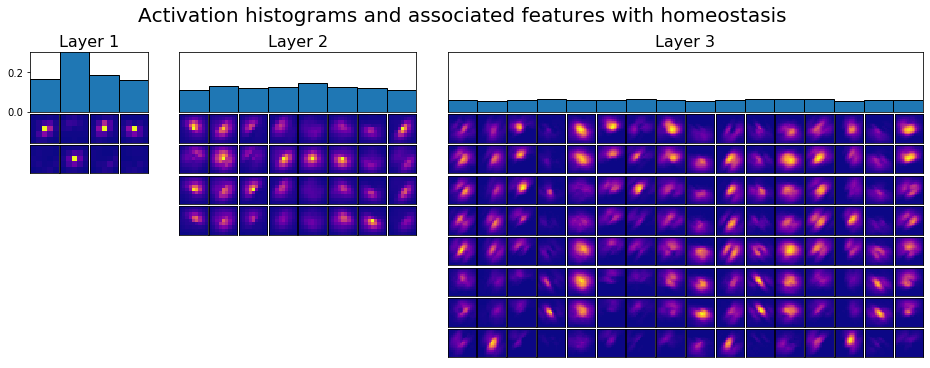


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 74.0% - eucli = 73.0% - norm = 73.0%
Classification scores with kNN: 3-NN = 67.0% - 6-NN = 64.0%
Classification scores with entropy: Kullback-Leibler = 74.0% - Jensen-Shannon = 74.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_0.6_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


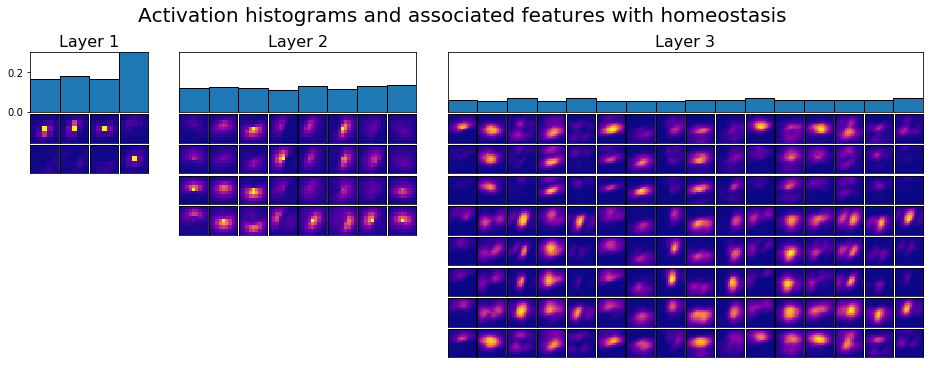


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 80.0% - eucli = 77.0% - norm = 76.0%
Classification scores with kNN: 3-NN = 79.0% - 6-NN = 82.0%
Classification scores with entropy: Kullback-Leibler = 80.0% - Jensen-Shannon = 80.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_0.7_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


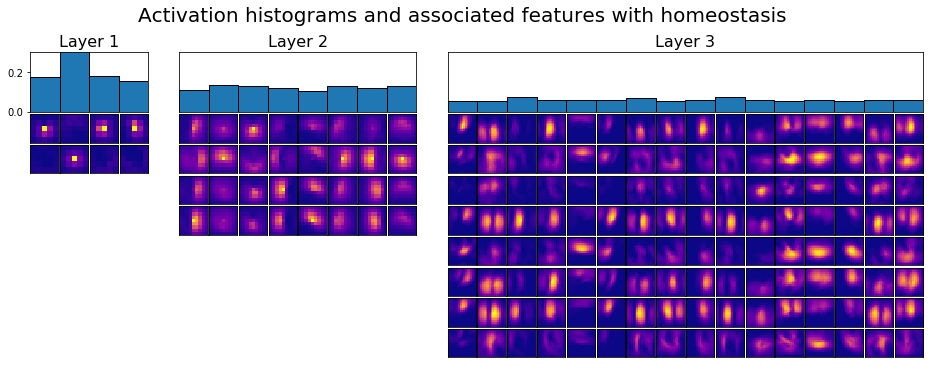


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 76.0% - eucli = 78.0% - norm = 77.0%
Classification scores with kNN: 3-NN = 77.0% - 6-NN = 74.0%
Classification scores with entropy: Kullback-Leibler = 76.0% - Jensen-Shannon = 76.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_0.7999999999999999_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


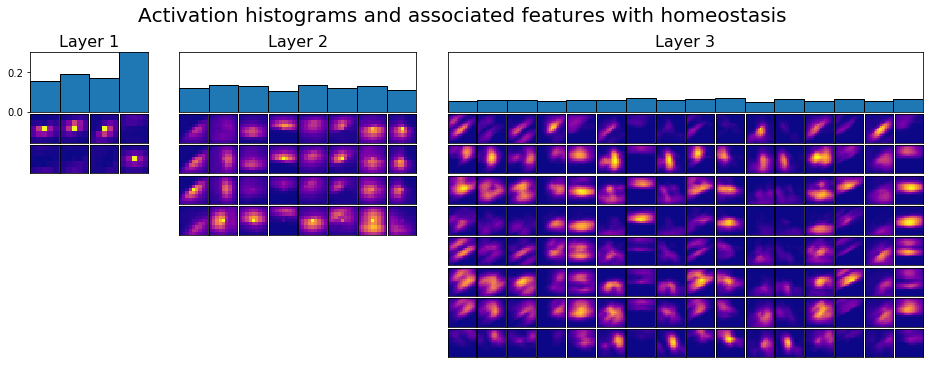


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 81.0% - eucli = 79.0% - norm = 79.0%
Classification scores with kNN: 3-NN = 84.0% - 6-NN = 86.0%
Classification scores with entropy: Kullback-Leibler = 81.0% - Jensen-Shannon = 81.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_0.8999999999999999_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


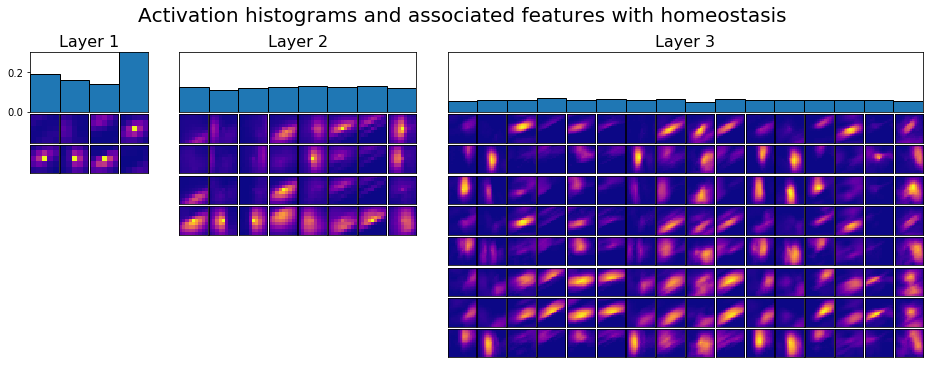


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 73.0% - eucli = 71.0% - norm = 71.0%
Classification scores with kNN: 3-NN = 71.0% - 6-NN = 75.0%
Classification scores with entropy: Kullback-Leibler = 74.0% - Jensen-Shannon = 73.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_0.9999999999999999_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


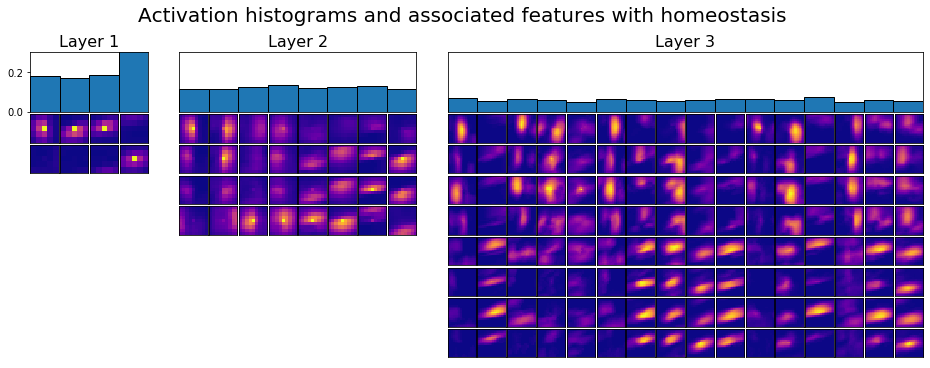


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 83.0% - eucli = 86.0% - norm = 86.0%
Classification scores with kNN: 3-NN = 87.0% - 6-NN = 82.0%
Classification scores with entropy: Kullback-Leibler = 83.0% - Jensen-Shannon = 83.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_1.0999999999999999_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


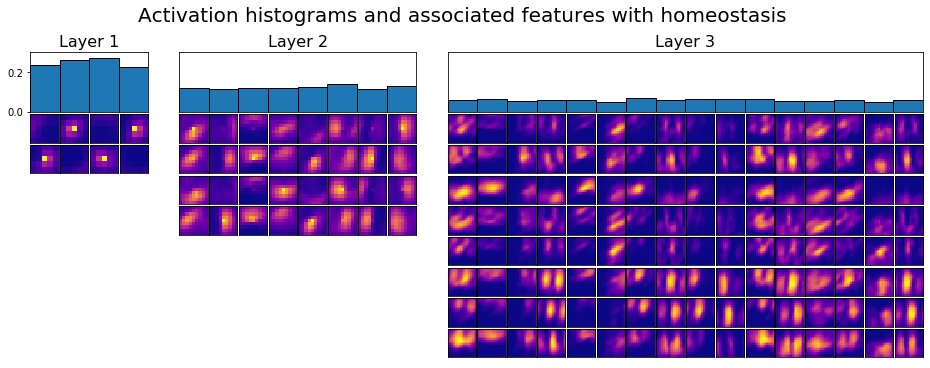

In [ ]:
nb_train = 500
nblay = 3
nbclust = 4
for sigma in np.arange(0.5,1.6,0.1):
    makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Add spatial jitter for pooling

In [ ]:
sigma = None
jitter = True
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Add translation invarianve preference

In [ ]:
jitter = False
homeinv = True
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Pooling

In [ ]:
pooling = True
nbclust = 8
hotshom = poolingnetwork(krnlinit='first', tau=tau, homeo=homeo, nbclust = nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learning1by1()
    with open(fname+'_model.pkl', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model.pkl', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
hotshom.plotlayer()
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
histoscore(trainmaphom,testmaphom)